In [1]:
import numpy as np
from PairsTradingPy import DataLoader, Pair, PairFilter, PairBacktesting
from PairsTradingPy.utils import frequency_convert

### DataLoader

**A foundational data pipeline**

*1. Overview*

In [2]:
DATA = DataLoader()

In [3]:
DATA

number of IDs: 7671
number of days: 4882, from 2001-01-02 to 2020-05-29
10 raw dataset(s) of shape (7671, 4882):
['CUM_DIV', 'IN_US_1', 'PRCCD', 'QES_GSECTOR', 'GGROUP', 'GIND', 'GSUBIND', 'RTN', 'FRTN1P', 'CUM_WEALTH']
return DataFrame by default

*2. Indexing*

In [6]:
# adjusted price data
DATA['PRCCD'].head()

,2001-01-02,2001-01-03,2001-01-04,2001-01-05,2001-01-08,2001-01-09,2001-01-10,2001-01-11,2001-01-12,2001-01-16,...,2020-05-15,2020-05-18,2020-05-19,2020-05-20,2020-05-21,2020-05-22,2020-05-26,2020-05-27,2020-05-28,2020-05-29
001004.01,12.312500,12.312500,12.500000,11.937500,11.750000,12.125000,12.187500,12.250000,13.250000,14.500000,...,15.24,17.65,17.129999,17.76,17.940001,17.92,19.26,21.27,20.74,20.17
001013.01,109.375031,141.750046,131.687546,119.000038,119.000038,112.437531,121.187538,131.687546,126.875038,120.312538,...,12.74,12.74,12.740000,12.74,12.740000,12.74,12.74,12.74,12.74,12.74
001034.01,41.750000,40.937500,36.750000,35.125000,34.125000,33.375000,32.625000,32.625000,35.062500,35.750000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
001038.01,3.000000,3.125000,2.937500,3.062500,3.625000,4.187500,4.000000,4.125000,4.187500,4.312500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
001045.01,38.687500,41.625000,43.062500,43.750000,41.500000,38.937500,38.687500,38.437500,36.812500,37.687500,...,11.39,11.39,11.390000,11.39,11.390000,11.39,11.39,11.39,11.39,11.39


In [7]:
DATA['PRCCD', '001004.01']

,2001-01-02,2001-01-03,2001-01-04,2001-01-05,2001-01-08,2001-01-09,2001-01-10,2001-01-11,2001-01-12,2001-01-16,...,2020-05-15,2020-05-18,2020-05-19,2020-05-20,2020-05-21,2020-05-22,2020-05-26,2020-05-27,2020-05-28,2020-05-29
001004.01,12.3125,12.3125,12.5,11.9375,11.75,12.125,12.1875,12.25,13.25,14.5,...,15.24,17.65,17.129999,17.76,17.940001,17.92,19.26,21.27,20.74,20.17


In [8]:
DATA['PRCCD', '001004.01', '2001-01-02']

12.3125

In [9]:
DATA['PRCCD', '001004.01', '2001-01-02':'2001-01-08']

,2001-01-02,2001-01-03,2001-01-04,2001-01-05,2001-01-08
001004.01,12.3125,12.3125,12.5,11.9375,11.75


In [10]:
DATA['PRCCD', :, '2001-01-02':'2001-01-08'].head()

,2001-01-02,2001-01-03,2001-01-04,2001-01-05,2001-01-08
001004.01,12.312500,12.312500,12.500000,11.937500,11.750000
001013.01,109.375031,141.750046,131.687546,119.000038,119.000038
001034.01,41.750000,40.937500,36.750000,35.125000,34.125000
001038.01,3.000000,3.125000,2.937500,3.062500,3.625000
001045.01,38.687500,41.625000,43.062500,43.750000,41.500000


*3. Change return type*

In [11]:
DATA.return_raw

False

In [12]:
DATA.return_raw = True

In [13]:
DATA
# pay attention to the change indicated by the last line

number of IDs: 7671
number of days: 4882, from 2001-01-02 to 2020-05-29
10 raw dataset(s) of shape (7671, 4882):
['CUM_DIV', 'IN_US_1', 'PRCCD', 'QES_GSECTOR', 'GGROUP', 'GIND', 'GSUBIND', 'RTN', 'FRTN1P', 'CUM_WEALTH']
return numpy array by default

In [14]:
DATA['PRCCD']

array([[ 12.3125 ,  12.3125 ,  12.5    , ...,  21.27   ,  20.74   ,
         20.17   ],
       [109.37503, 141.75005, 131.68755, ...,  12.74   ,  12.74   ,
         12.74   ],
       [ 41.75   ,  40.9375 ,  36.75   , ...,       nan,       nan,
              nan],
       ...,
       [      nan,       nan,       nan, ...,  85.92   ,  85.92   ,
         85.92   ],
       [      nan,       nan,       nan, ..., 281.5    , 284.42   ,
        300.095  ],
       [      nan,       nan,       nan, ...,  18.5    ,  17.4    ,
         17.38   ]], dtype=float32)

In [15]:
DATA['PRCCD', '001004.01']

array([[12.3125, 12.3125, 12.5   , ..., 21.27  , 20.74  , 20.17  ]],
      dtype=float32)

*4. Get preprocessed data*

In [16]:
# market equal weighted return
DATA.get_processed_data('MKT_RTN_EQUI')

,2001-01-02,2001-01-03,2001-01-04,2001-01-05,2001-01-08,2001-01-09,2001-01-10,2001-01-11,2001-01-12,2001-01-16,...,2020-05-15,2020-05-18,2020-05-19,2020-05-20,2020-05-21,2020-05-22,2020-05-26,2020-05-27,2020-05-28,2020-05-29
0,-0.030155,0.058586,-0.000922,-0.028125,-0.006788,0.009682,0.02848,0.031204,0.017486,0.023562,...,0.013431,0.067748,-0.020032,0.032379,0.001103,0.003938,0.035536,0.033891,-0.021626,-0.007784


In [17]:
# industry equal weighted return
DATA.get_processed_data('IND_RTN_EQUI').head()

,2001-01-02,2001-01-03,2001-01-04,2001-01-05,2001-01-08,2001-01-09,2001-01-10,2001-01-11,2001-01-12,2001-01-16,...,2020-05-15,2020-05-18,2020-05-19,2020-05-20,2020-05-21,2020-05-22,2020-05-26,2020-05-27,2020-05-28,2020-05-29
001004.01,-0.012254,0.026263,0.012509,-0.012147,-0.009812,0.012686,0.014664,0.010162,0.000009,0.013775,...,2.074898e-03,4.304606e-02,-1.166500e-02,1.344147e-02,5.799794e-03,4.635293e-04,2.627243e-02,2.945791e-02,-3.734023e-03,-7.667016e-03
001013.01,-0.066926,0.123688,0.002202,-0.065214,-0.022140,0.011318,0.061806,0.104737,0.048085,0.016583,...,2.415521e-01,1.261580e-02,-9.174460e-03,1.897935e-02,-3.427799e-03,8.539075e-03,9.323875e-03,8.385785e-03,-4.026885e-03,4.159006e-03
001034.01,-0.010210,0.024697,-0.002724,-0.035579,-0.029523,-0.005828,0.024279,0.018278,0.031454,0.053753,...,7.618625e-03,2.805496e-02,1.581695e-02,1.245612e-02,-2.864723e-03,6.285482e-02,9.403113e-03,-2.216690e-03,-4.492973e-03,-1.356889e-02
001038.01,-0.023228,0.064313,0.039584,-0.022443,-0.013850,0.013114,0.017579,0.035281,0.025525,0.019175,...,-1.599014e-09,-1.599014e-09,-1.599014e-09,-1.599014e-09,-1.599014e-09,-1.599014e-09,-1.599014e-09,-1.599014e-09,-1.599014e-09,-1.599014e-09
001045.01,-0.001079,0.041274,0.033768,0.002635,0.003798,-0.026464,0.002638,-0.006128,-0.007152,0.004490,...,-9.650721e-03,8.548763e-02,-1.354999e-02,3.013440e-02,1.357568e-02,-8.211148e-03,8.437411e-02,3.401700e-02,-3.480890e-02,-1.206293e-02


### PairFilter

**Automatic selection of pairs given filtering conditions**

*1. Create a PairFilter instance*

In [3]:
pair_filter = PairFilter(DATA)

*2. Specify filtering conditions*

Specify the selection process in a **chained** fashion before actual computation starts

In [4]:
filter_conditions = pair_filter.new_filter()

filter_conditions.start()

# Only analyze the Financials sector (GICS sector code: 40)
filter_conditions.industry_subset(subset=40)

# Two companies must be in the same GICS industry (GICS level 3)
filter_conditions.same_industry(gics_level=3)

# Difference of beta is less and equal to 0.3
filter_conditions.beta_diff().less_than(0.3, inclusive=True)

# residual return correlation must be among the top 20% percentile within the same industry, cross-sectionally
filter_conditions.correlation(corr_type='residual').top(0.2)

# Hurst Exponent
filter_conditions.hurst().less_than(0.5)

# Cointegration Test
filter_conditions.coint_Johansen().top(0.1)
# filter_conditions.coint_.EG().top(0.1)  # Engle-Granger Cointegration Test

# ADF test statistics must be among the top 5% percentile within the same industry, cross-sectionally
filter_conditions.ADF().top(0.1)

filter_conditions.end()

*3. Select Pairs on specific dates*

In [5]:
dates_ = np.unique(frequency_convert(DATA.dates, 'M'))[-26:-24]
dates_

array(['2018-04-30', '2018-05-31'], dtype=object)

In [6]:
import time
start_time = time.time()
pairs_dict = pair_filter.filter_given_dates(dates=dates_)
print('time consumed: {} s'.format(round(time.time() - start_time, 2)))

applying "difference of beta" condition


2it [00:00, 18.89it/s]


applying "correlation" condition


272it [00:13, 19.74it/s]
100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 20.39it/s]


applying "Hurst Exponent" condition


100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:31<00:00, 16.23s/it]


applying "Johansen cointegration test" condition


100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [02:42<00:00, 80.56s/it]


applying "Augmented DF test" condition


100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:58<00:00, 29.42s/it]


time consumed: 283.85 s


In [7]:
pairs_dict.keys()

dict_keys(['2018-04-30', '2018-05-31'])

In [8]:
len(pairs_dict['2018-05-31'])

96

*4. Inspect intermediate results / cache*

In [9]:
pair_filter.cache.keys()

dict_keys(['class', 'subset_class', 'beta_diff', 'correlation', 'hurst', 'coint_Johansen', 'ADF'])

In [10]:
pair_filter.cache['ADF']['auto_lag#None|#by#(industry|#gics_level#3|#subset#(40|))|#freq#D|#max_lag#4|#top#0.1|#window#252']['2018-04-30']

,A,B,class,score
0,002968.01,004640.01,401010.0,4.404139
1,003231.01,004674.01,401010.0,3.600538
2,003231.01,004699.01,401010.0,4.296898
3,004674.01,004699.01,401010.0,3.396330
4,004640.01,004723.01,401010.0,3.309330
5,003243.01,004737.01,401010.0,3.597521
6,004723.01,004737.01,401010.0,3.706892
7,002968.01,008245.01,401010.0,3.495680
8,004674.01,009783.01,401010.0,3.330236
9,005786.01,010187.01,401010.0,3.978529


In [11]:
pair_filter.interim_result.keys()

dict_keys(['beta', 'correlation', 'hurst', 'coint_Johansen', 'ADF'])

In [12]:
pair_filter.interim_result['correlation']['by#(industry|#gics_level#3|#subset#(40|))|#corr_type#residual|#freq#D|#window#252']['2018-04-30'].keys()

dict_keys([401010.0, 401020.0, 402010.0, 402020.0, 402030.0, 402040.0, 403010.0])

In [13]:
pair_filter.interim_result['coint_Johansen']['by#(industry|#gics_level#3|#subset#(40|))|#freq#D|#k_ar_diff#4|#window#252']['2018-04-30'].keys()

dict_keys([401010.0, 401020.0, 402010.0, 402020.0, 402030.0, 402040.0, 403010.0])

In [14]:
pair_filter.interim_result['ADF']['auto_lag#None|#by#(industry|#gics_level#3|#subset#(40|))|#freq#D|#max_lag#4|#window#252']['2018-04-30'].keys()

dict_keys([401010.0, 401020.0, 402010.0, 402020.0, 402030.0, 402040.0, 403010.0])

*5. Adjust filter conditions to start new matching processes*

Note that the time consumed is **reduced** to 0.93 seconds

In [15]:
filter_conditions = pair_filter.new_filter()
filter_conditions.start()
filter_conditions.industry_subset(subset=40)
filter_conditions.same_industry(gics_level=3)
filter_conditions.beta_diff().less_than(0.3, inclusive=True)
filter_conditions.correlation(corr_type='residual').top(0.1).by(gics_level=3)
filter_conditions.hurst().less_than(0.5).by(gics_level=3)
filter_conditions.coint_Johansen().top(0.1).by(gics_level=3)
filter_conditions.ADF().top(0.1).by(gics_level=3)
filter_conditions.end()

In [16]:
start_time = time.time()
pairs_dict = pair_filter.filter_given_dates(dates=dates_)
print('time consumed: {} s'.format(round(time.time() - start_time, 2)))

applying "difference of beta" condition
applying "correlation" condition
applying "Hurst Exponent" condition
applying "Johansen cointegration test" condition
applying "Augmented DF test" condition
time consumed: 0.93 s


### Pair

**Backtesting & visualization of arbitrary pairs**

*1. Example A: no trade is triggered*

In [3]:
p = Pair('001449.01', '001487.01', identified_date='2018-05-31', DataLoader=DATA)

In [4]:
p.update_to_termination()

In [5]:
p.visualize()

No trade is triggered during the first 21 days after this pair is identified


*Example B: hit mean reversion*

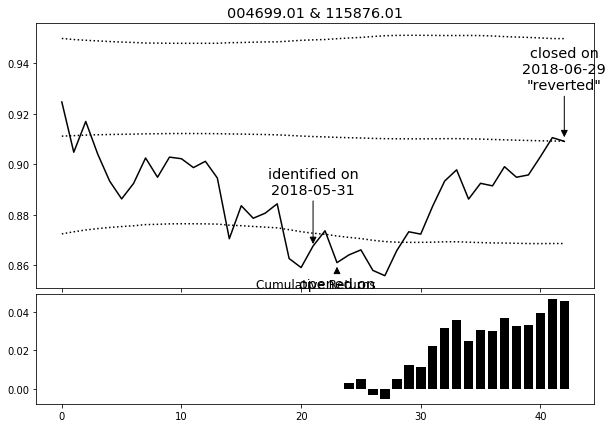

In [30]:
p = Pair('004699.01', '115876.01', identified_date='2018-05-31', DataLoader=DATA)
p.update_to_termination()
p.visualize()

In [31]:
print('holding period return: {}'.format(p.performance['holding_period_return']))
print('max drawdown: {}'.format(p.performance['mdd']))
print('max negative return: {}'.format(p.performance['max_negative_return']))

holding period return: 0.04569281784069246
max drawdown: -0.010769772546286194
max negative return: -0.005256203642499235


*Example C: reach maximum holding period*

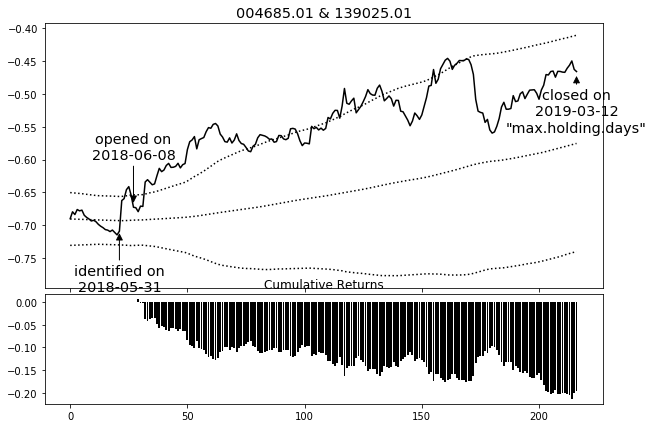

In [32]:
p = Pair('004685.01', '139025.01', identified_date='2018-05-31', DataLoader=DATA)
p.update_to_termination()
p.visualize()

### PairBacktesing

**Backtesting of the entire pairs trading strategy**

*1. Set parameters*

|parameter|example value|meaning|
|--|--|--|
|start_date|'2017-06-30'|pair selection starts from this day|
|end_date|'2018-05-31'|pair selection ends on this day (selected pairs are eligible for trading)|
|identification_freq|'1M'|at which frequency should pair selection occur|
|holding_window|'9M'|the maximum period for which an opened trade can remain open|
|tracking_window|'1M'|the period for which any identified pair remains effective|
|cooling_window|'5D'|the minimum interval between opening two positions involving the same pair|
|use_half_life|True|if True, pairs eligible for trading must satisfy half life * 2 < max holding period and coefficient significant at 5% level|
|max_reactivate_rounds|1 (default: None)|how many times a pair may trigger trades during the tracking window|
|same_type_constraint|False|if True, two consecutive positions involving the same pair must be of different directions|



In [20]:
pair_backtest = PairBacktesting(pair_filter=pair_filter, 
                     start_date='2018-04-30', end_date='2018-05-31', 
                     identification_freq='1M', holding_window='9M', 
                     tracking_window='1M', cooling_window='1D', use_half_life=True,
                     max_reactivate_rounds=0, same_type_constraint=False)

Automatically convert holding_window from 9M to 189D (21 days per month)


*2. Run the backtesting*

In [21]:
pair_backtest.run()

2018-05-31: 100%|████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 12.61it/s]


*3. Get the summary table (for further analysis)*

In [26]:
pair_backtest.get_summary_table()

,identified_date,type,long_leg,short_leg,open_date,close_date,exit_reason,holding_days,return,mdd,max_neg_return
0,2018-04-30,long,002968.01,004640.01,2018-05-10,2018-05-22,reverted,8,0.049201,-0.022539,-0.022539
1,2018-04-30,short,006653.01,004201.01,2018-05-18,2018-11-20,reverted,129,0.004426,-0.180868,-0.146981
2,2018-04-30,long,004699.01,115876.01,2018-05-23,2018-06-29,reverted,26,0.028434,-0.028213,-0.022713
3,2018-04-30,short,025030.01,008898.01,2018-05-03,2018-06-18,reverted,31,0.039682,-0.072951,-0.068148
4,2018-04-30,short,114628.01,008898.01,2018-05-04,2018-10-25,reverted,121,0.067756,-0.131144,-0.131144
5,2018-04-30,short,011856.01,011687.01,2018-05-01,2018-07-30,reverted,62,0.020438,-0.048199,-0.043135
6,2018-04-30,short,114628.01,012124.01,2018-05-04,2018-08-14,reverted,70,0.043895,-0.054680,-0.054680
7,2018-04-30,short,014253.01,014219.01,2018-05-31,2018-07-26,reverted,39,0.057140,-0.032385,-0.003620
8,2018-04-30,long,014253.01,016832.01,2018-05-31,2019-01-16,reverted,158,-0.037847,-0.133748,-0.122121
9,2018-04-30,short,031368.01,014253.01,2018-05-18,2018-05-23,reverted,3,0.054274,0.000000,NaN


In [27]:
pair_backtest.summary_table()['exit_reason'].value_counts()/len(pair_backtest.summary_table())

reverted            0.827586
max.holding.days    0.172414
Name: exit_reason, dtype: float64

In [28]:
pair_backtest.activated_pairs['2018-05-31']

[Pair 004685.01 and 139025.01 identified at 2018-05-31,
 Pair 004699.01 and 115876.01 identified at 2018-05-31,
 Pair 006653.01 and 066599.01 identified at 2018-05-31,
 Pair 014253.01 and 024232.01 identified at 2018-05-31,
 Pair 014253.01 and 031368.01 identified at 2018-05-31,
 Pair 015199.01 and 016845.01 identified at 2018-05-31,
 Pair 015199.01 and 019355.01 identified at 2018-05-31,
 Pair 015199.01 and 137351.01 identified at 2018-05-31,
 Pair 017095.01 and 109621.01 identified at 2018-05-31,
 Pair 018329.01 and 064547.01 identified at 2018-05-31,
 Pair 024466.01 and 164633.01 identified at 2018-05-31,
 Pair 061693.01 and 174313.01 identified at 2018-05-31,
 Pair 064547.01 and 139025.01 identified at 2018-05-31,
 Pair 109621.01 and 137351.01 identified at 2018-05-31]